<a href="https://colab.research.google.com/github/tdlinh2712/DeepLearning-with-Tensorflow/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-05-27 02:33:43--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-05-27 02:33:43 (15.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data

NameError: ignored

In [ ]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

In [ ]:
X

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

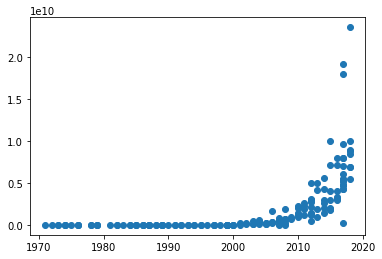

In [ ]:
plt.scatter(X, Y)

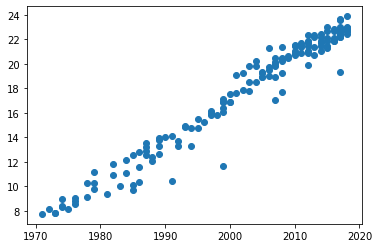

In [ ]:
Y = np.log(Y)
plt.scatter(X, Y)

In [ ]:
X = X - X.mean()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),loss='mse')

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001


In [ ]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 8ms/step - loss: 476.0033 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 538.8721 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 628.8514 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 388.9406 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 272.0465 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 140.9292 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 89.7342 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 78.2274 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 53.5615 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 39.7407 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 2

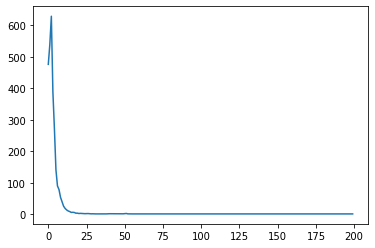

In [ ]:
plt.plot(r.history['loss'], label='loss')

In [ ]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3320642]], dtype=float32), array([17.773823], dtype=float32)]


In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
print("time to double:", np.log(2) / a)

time to double: 2.0873889953489013


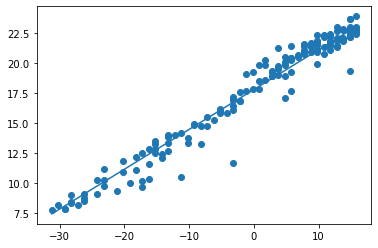

In [ ]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [ ]:
# manual calculation
# get the weights
w, b = model.layers[0].get_weights()

X = X.reshape(-1, 1)

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat, Yhat2)

True

In [ ]:
# saving model